# KNN in python

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import seaborn as sns

In [10]:
%matplotlib inline

# Load data

In [11]:
KNN_M=pd.read_csv('/Users/atousa/Desktop/sheridan/Python-Data-Science-and-Machine-Learning-Bootcamp 2/KNN_model_data.csv')

In [12]:
KNN_M.head(n=5)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [13]:
KNN_M.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


# Data visualization

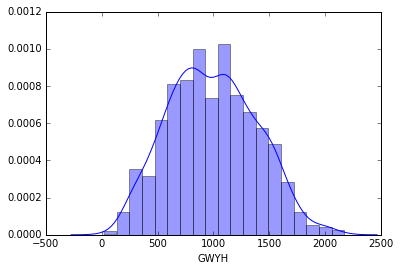

In [16]:
sns.distplot(KNN_M['GWYH']);

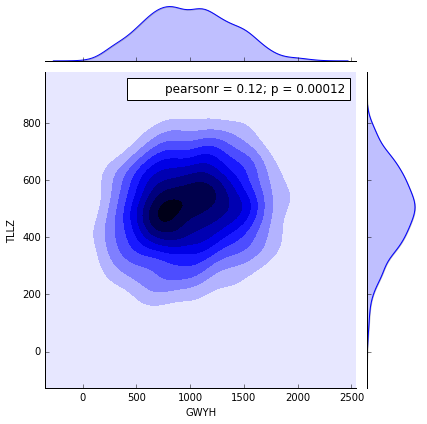

In [18]:
sns.jointplot(x='GWYH', y="TLLZ", data=KNN_M, kind="kde");

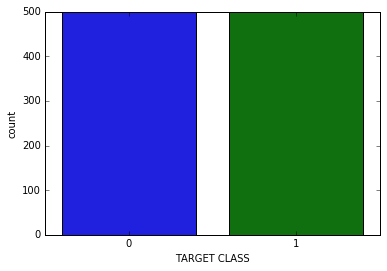

In [22]:
sns.countplot(x="TARGET CLASS", data=KNN_M); 

In [23]:
KNN_M["TARGET CLASS"].sum()

500

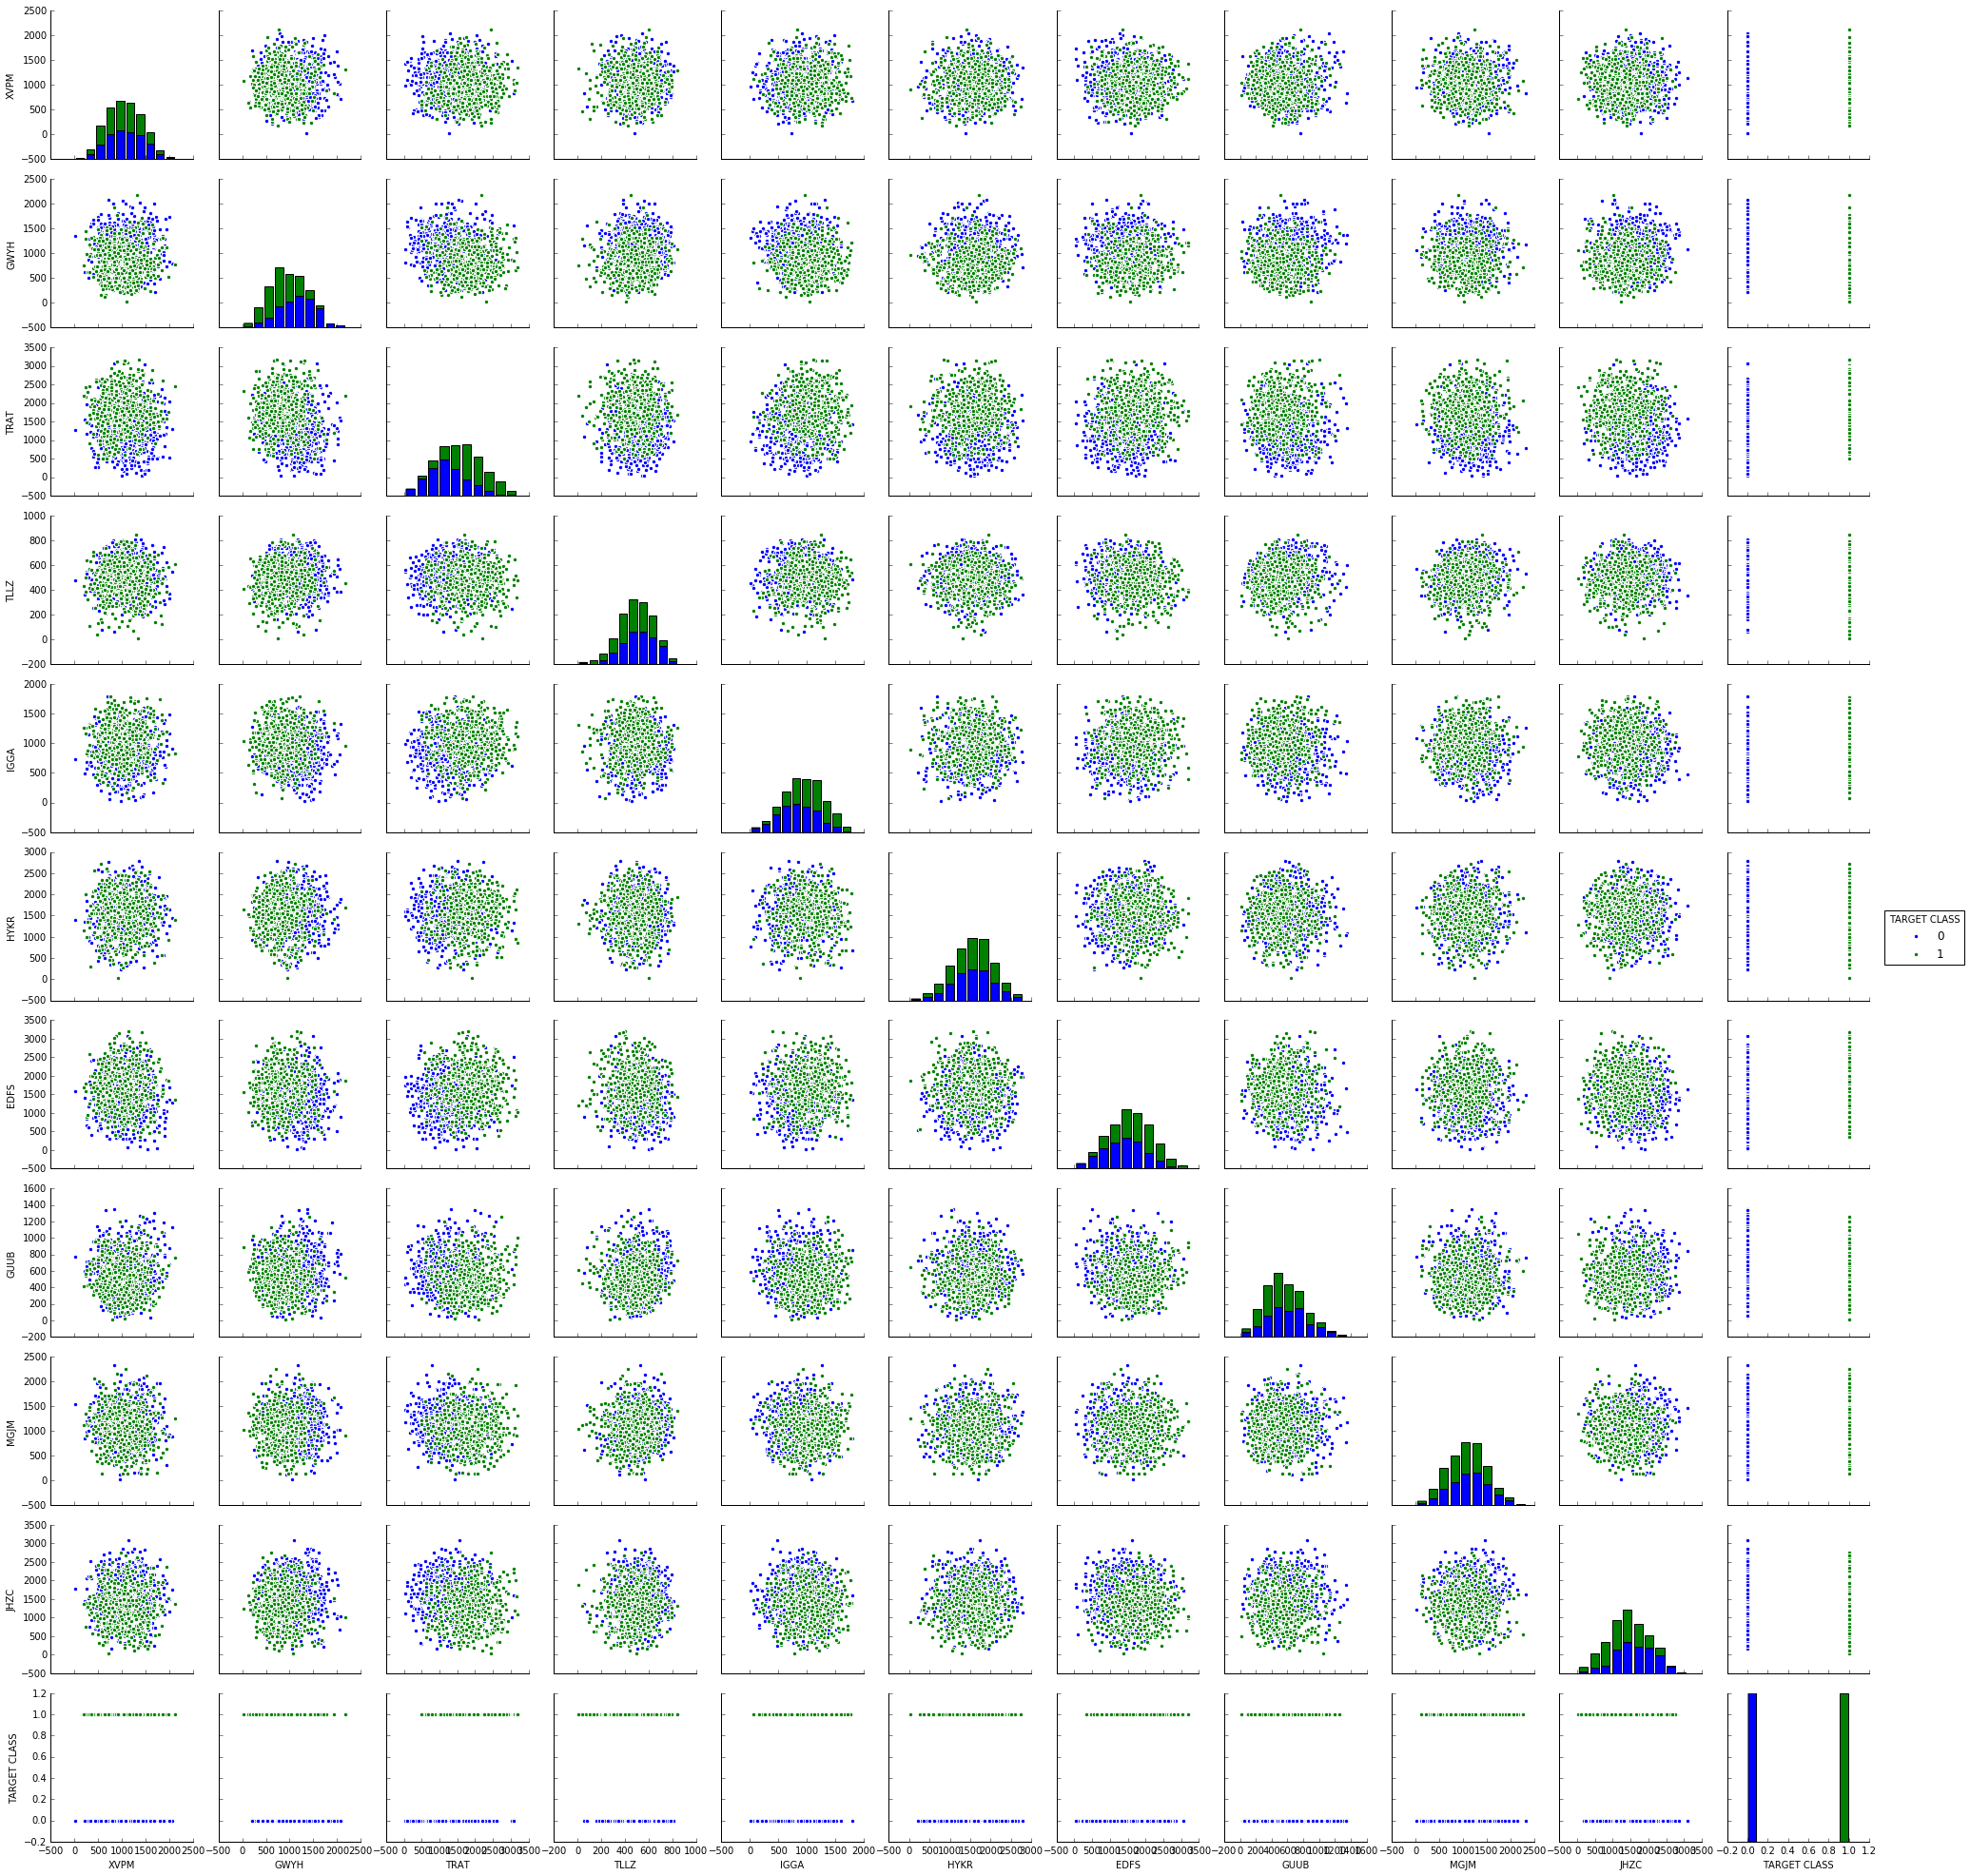

In [14]:
sns.pairplot(KNN_M,hue='TARGET CLASS')

# Preprocessing

In [12]:
x=KNN_M.drop('TARGET CLASS',axis=1)

In [13]:
scaler=StandardScaler()

In [14]:
x=scaler.fit(x).transform(x)

In [15]:
x.shape

(1000, 10)

In [16]:
x[1:5,:]

array([[-0.11237594, -1.05657361,  1.7419175 , -1.50422015,  0.64000936,
         1.08155221, -1.18266332, -0.46186435,  0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285,  0.21339413, -0.0531708 ,
         2.03087225, -1.24070739,  1.14929806,  2.1847836 ,  0.34281129],
       [ 0.01153303,  0.19132405, -1.43347252, -0.10005318, -1.50722308,
        -1.75363188, -1.18356113, -0.88855689,  0.16230961, -0.00279348],
       [-0.09905922,  0.82081532, -0.90434645,  1.60901484, -0.28206546,
        -0.36509894, -1.09564397,  0.39141925, -1.3656025 ,  0.78776233]])

In [17]:
y=KNN_M['TARGET CLASS']

# Cross-validation

In [18]:
X_train,X_test,y_train,y_test=train_test_split (x,y, test_size=0.33,random_state=4)

# Apply KNN algorithm

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Prediction

In [22]:
pred=knn.predict(X_test)

In [23]:
X_test.shape

(330, 10)

In [121]:
type(X_test)

numpy.ndarray

In [24]:
X_test[1:5,:]

array([[-0.02958319, -0.3604408 ,  0.14815636,  1.15029682,  2.1687601 ,
        -0.40672552,  1.44498671,  0.03505016,  0.3054209 ,  0.17390834],
       [-0.93389008, -0.23442707, -1.22819062, -1.54288191, -1.69497034,
         0.10830814, -0.14242573,  0.87584328,  0.36868263,  1.77728315],
       [-0.18851892, -1.33836387,  0.35961073, -0.16466086,  0.93816522,
         1.80940628, -0.40407267, -0.64841758,  0.23950373,  0.77113232],
       [-0.31098839, -0.34488546,  0.05346365,  0.93955804,  0.43732849,
        -1.53569304, -1.31158778, -1.64359997,  0.57274375,  0.26350163]])

# Model Evaluation

In [25]:
from sklearn.metrics import  classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.70      0.77      0.73       155
          1       0.78      0.70      0.74       175

avg / total       0.74      0.74      0.74       330



In [27]:
print(confusion_matrix(y_test,pred))

[[120  35]
 [ 52 123]]


# Model optimization(elbow plot)

In [28]:
error_rate=[]
counter=[]
for i in range(1,20,1):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    counter.append(i)

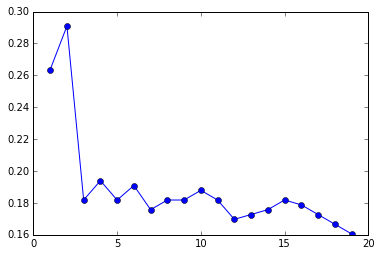

In [29]:
plt.plot(counter,error_rate,marker='o')

In [31]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [32]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.78      0.85      0.81       155
          1       0.85      0.79      0.82       175

avg / total       0.82      0.82      0.82       330



In [33]:
print(confusion_matrix(y_test,pred))

[[131  24]
 [ 36 139]]
